# Project: Data Wrangling - [WeRateDogs]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction
> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a rating more than 10/10. Another data source is image prediction also there is another source about favorite count and retweet.
> But there is important question that needs good analysis to answer "Which is the favorite type?"
>
> Is it the most frequent type?
>
> Is it the type with highest average rating?
>
> Is it the type that has highest retweets and favorite counts?
>
> Can we depend on the first image only to determine the dog type?

#### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

<a id='eda'></a>
## Exploratory Data analysis

### Visualizition and Insights

In [2]:
df_twitter_master = pd.read_csv('twitter_archive_master.csv')

In [3]:
df_twitter_master.head(1)

,tweet_id,timestamp,expanded_urls,rating_numerator,name,Type,retweet_count,favorite_count,jpg_url,image_number,Name_at_First_Picture,Confindence_At_First_Algorithm,p1_dog,Name_at_Second_Picture,Confindence_At_Second_Algorithm,p2_dog,Name_at_Third_Picture,Confindence_At_Third_Algorithm,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False


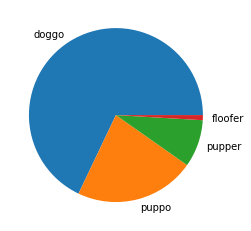

In [4]:
graph_index = ['doggo','puppo','pupper','floofer']
plt.pie(df_twitter_master.Type.value_counts(),labels = graph_index);

doggo has the most tweets

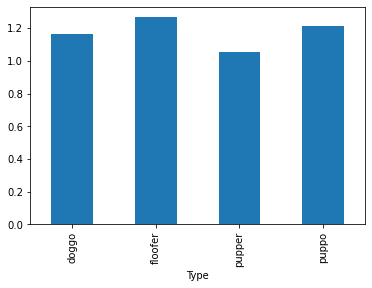

In [5]:
df_twitter_master.groupby("Type").rating_numerator.mean().plot.bar();

floofer seems to be the popular type between the different types

In [6]:
retweet_count = df_twitter_master.groupby("Type").retweet_count.mean()
favorite_count = df_twitter_master.groupby("Type").favorite_count.mean()

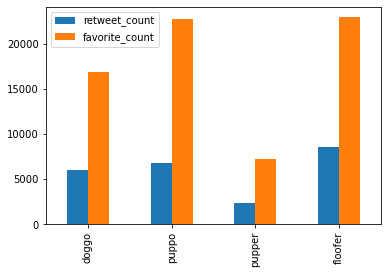

In [7]:
df = pd.DataFrame({'retweet_count': retweet_count,'favorite_count': favorite_count}, index=graph_index)
ax = df.plot.bar()

floofer seems to have the highest average for both of the highest count of retweet and favourite.

In [8]:
df_twitter_master.groupby("image_number").Confindence_At_First_Algorithm.describe()

,count,mean,std,min,25%,50%,75%,max
image_number,,,,,,,,
1,1694.0,0.571200,0.273398,0.044333,0.339071,0.546276,0.822089,1.000000
2,189.0,0.704485,0.217923,0.160888,0.548018,0.767005,0.883086,0.998886
3,62.0,0.766557,0.224783,0.199512,0.643825,0.844979,0.965349,0.999984
4,30.0,0.815534,0.191901,0.226716,0.768192,0.880560,0.944954,0.999953


<a id='conclusions'></a>
## Conclusions

> Pupper is the most frequent type that mentioned.

> floofer has the least mentions but it has the highest average of rating, so mentioned few but gets high rating also has the highest average for both of retweets and favourites

> The first image is the most frequent to verify the type while the most accurate value can be optained from the fourth image

<a id='ref'></a>
## References

#### Histogram
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
#### Pie Chart
https://www.w3schools.com/python/matplotlib_pie_charts.asp
#### Bar plot
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

## Thank You